In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB as bb
from sklearn.naive_bayes import GaussianNB as gb
from sklearn.naive_bayes import MultinomialNB as mb

In [37]:
orig_train_data = pd.read_csv('SalaryData_Train.csv')
orig_test_data = pd.read_csv('SalaryData_Test.csv')

In [38]:
train_data = orig_train_data.copy()
test_data = orig_test_data.copy()
train_data.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [5]:
train_data.tail(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
30160,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
train_data.shape

(30161, 14)

In [7]:
train_data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [8]:
train_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
train_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


## Visualizations for training data

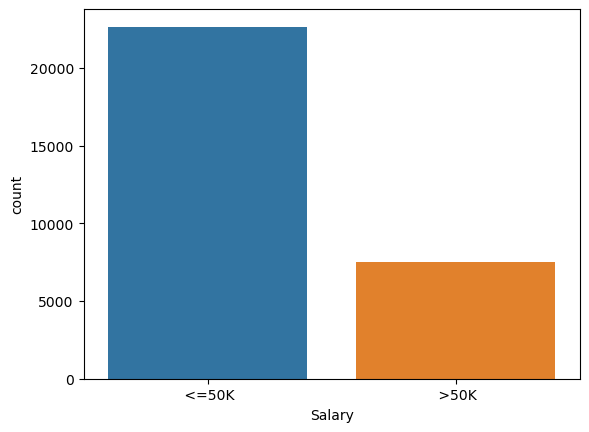

In [11]:
sns.countplot(x = 'Salary', data = train_data)
plt.show()

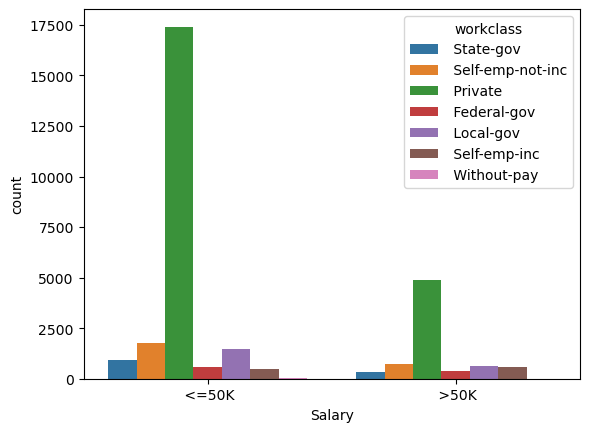

In [12]:
sns.countplot(x = 'Salary', data = train_data, hue= 'workclass')
plt.show()

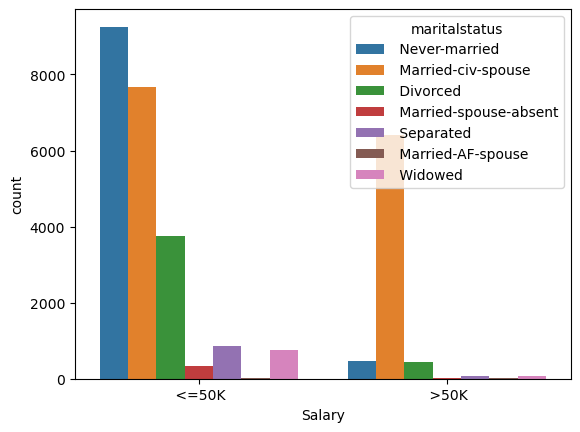

In [13]:
sns.countplot(x = 'Salary', data = train_data, hue= 'maritalstatus')
plt.show()

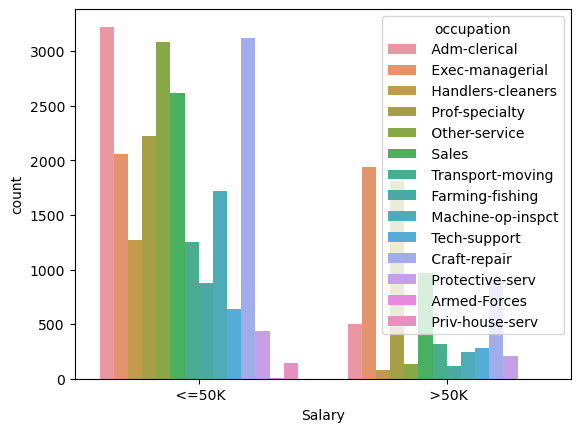

In [14]:
sns.countplot(x = 'Salary', data = train_data, hue= 'occupation')
plt.show()

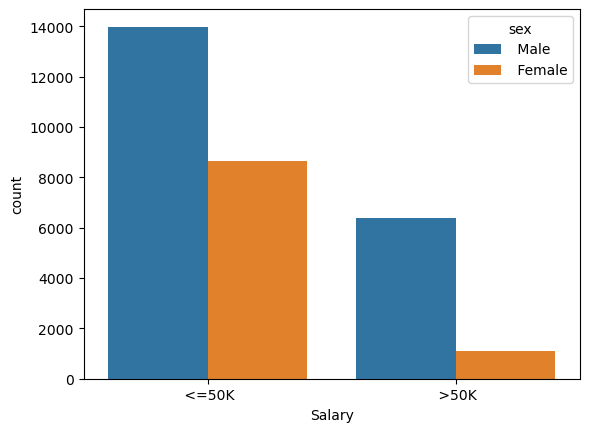

In [15]:
sns.countplot(x = 'Salary', data = train_data, hue= 'sex')
plt.show()

## Data Preparation for use in model

### --  Label Encoding of non numerical data

In [16]:
le = LabelEncoder()

In [17]:
train_data['Salary'] = le.fit_transform(train_data['Salary'])
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [18]:
test_data['Salary'] = le.fit_transform(test_data['Salary'])
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [19]:
train_data = pd.get_dummies(data = train_data,columns=['workclass', 'education', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex','native'])
train_data.head(3)

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
test_data = pd.get_dummies(data = test_data,columns=['workclass', 'education', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex','native'])
test_data.head(3)

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
train_data['Salary'] = le.fit_transform(train_data['Salary'])
train_data.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
train_data.shape

(30161, 103)

+ Distribution plot for capital gain and loss

<Figure size 1000x800 with 0 Axes>

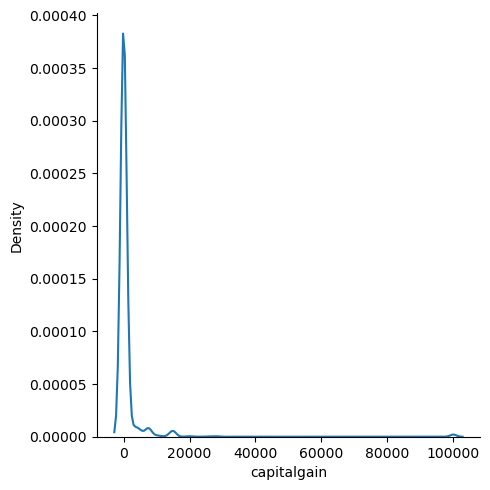

In [23]:
plt.figure(figsize=(10,8))
sns.displot(train_data['capitalgain'],kind="kde" )
plt.show()

<Figure size 1000x800 with 0 Axes>

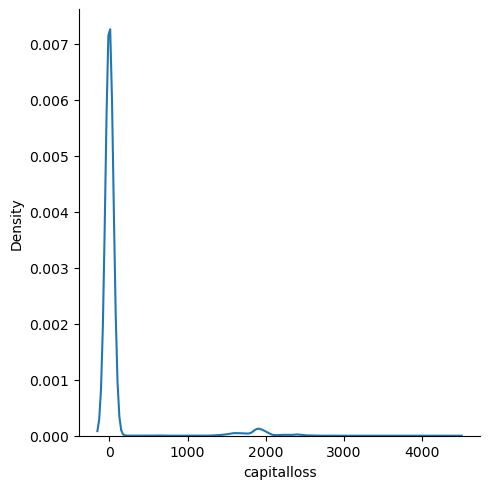

In [24]:
plt.figure(figsize=(10,8))
sns.displot(train_data['capitalloss'],kind="kde" )
plt.show()

### -- Seperation dependent and independent variable

In [25]:
X_train = train_data.drop('Salary',axis=1)
X_train.head(3)

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
Y_train = train_data['Salary']
Y_train.head(3)

0    0
1    0
2    0
Name: Salary, dtype: int64

In [27]:
X_test = test_data.drop('Salary',axis=1)
X_test.head(3)

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
Y_test = test_data['Salary']
Y_test.head(3)

0    0
1    0
2    1
Name: Salary, dtype: int32

## Naive Bayes Model fitting and prediction

In [29]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

### Bernouli Naive Bayes

In [30]:
bb_model = bb()
bb_model.fit(X_train,Y_train)

BernoulliNB()

In [31]:
train_pred = bb_model.predict(X_train)

In [32]:
accuracy_score(Y_train,train_pred)

0.7555120851430656

In [33]:
print(classification_report(Y_train,train_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82     22653
           1       0.51      0.79      0.62      7508

    accuracy                           0.76     30161
   macro avg       0.71      0.77      0.72     30161
weighted avg       0.81      0.76      0.77     30161



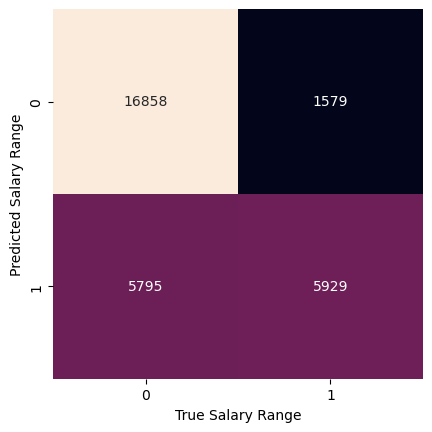

In [45]:
mat = confusion_matrix(Y_train,train_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel("True Salary Range")
plt.ylabel("Predicted Salary Range")
plt.show()

## NOTE :- 
- Here the Label 
+   0 - Indicates salary <=50K
+   1 - Indicates salary >50K

In [47]:
test_pred = bb_model.predict(X_test)

In [48]:
accuracy_score(Y_test,test_pred)

0.7598273572377158

In [49]:
print(classification_report(Y_test,test_pred))

              precision    recall  f1-score   support

           0       0.92      0.75      0.82     11360
           1       0.51      0.79      0.62      3700

    accuracy                           0.76     15060
   macro avg       0.71      0.77      0.72     15060
weighted avg       0.82      0.76      0.77     15060



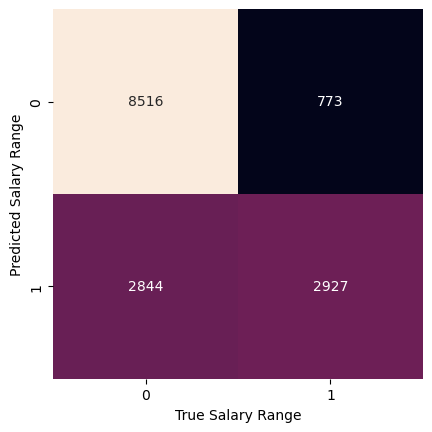

In [50]:
mat = confusion_matrix(Y_test,test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel("True Salary Range")
plt.ylabel("Predicted Salary Range")
plt.show()

+ The accuracy score for training data (75.55 %) and testing data(75.98 %) for bernoulii Naive Bayes are nearly same. 
# Now Lets use Gausian Naive Bayes for the Data

In [51]:
gb_model = gb()
gb_model.fit(X_train,Y_train)

GaussianNB()

In [52]:
trn_pred = gb_model.predict(X_train)

In [53]:
accuracy_score(Y_train,trn_pred)

0.8031563940187659

In [54]:
print(classification_report(Y_train,trn_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86     22653
           1       0.57      0.81      0.67      7508

    accuracy                           0.80     30161
   macro avg       0.75      0.81      0.77     30161
weighted avg       0.84      0.80      0.81     30161



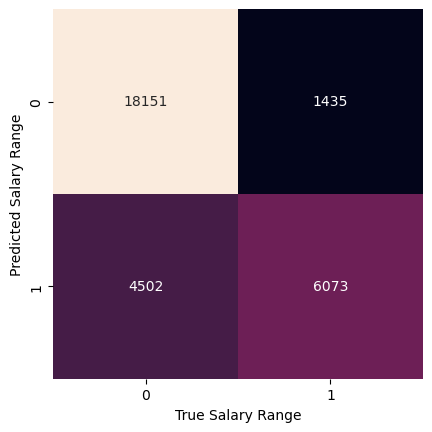

In [55]:
mat = confusion_matrix(Y_train,trn_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel("True Salary Range")
plt.ylabel("Predicted Salary Range")
plt.show()

In [56]:
tst_pred = gb_model.predict(X_test)

In [57]:
accuracy_score(Y_test,tst_pred)

0.8029216467463479

In [58]:
print(classification_report(Y_test,tst_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86     11360
           1       0.57      0.82      0.67      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.84      0.80      0.81     15060



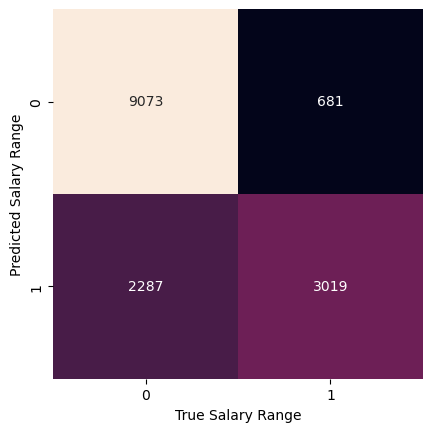

In [59]:
mat = confusion_matrix(Y_test,tst_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel("True Salary Range")
plt.ylabel("Predicted Salary Range")
plt.show()

## Note :- 
+ Using Gausian Naive Bayes the accuracy score for the train data is nearly 80% which is nearly the same for test data 

# Finally let's apply the Multinomial Naive Bayes for the Data

In [60]:
mb_model = mb()
mb_model.fit(X_train,Y_train)

MultinomialNB()

In [61]:
tnr_pred = mb_model.predict(X_train)

In [62]:
accuracy_score(Y_train,tnr_pred)

0.7729186698053778

In [63]:
print(classification_report(Y_train,tnr_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86     22653
           1       0.63      0.21      0.32      7508

    accuracy                           0.77     30161
   macro avg       0.71      0.59      0.59     30161
weighted avg       0.75      0.77      0.73     30161



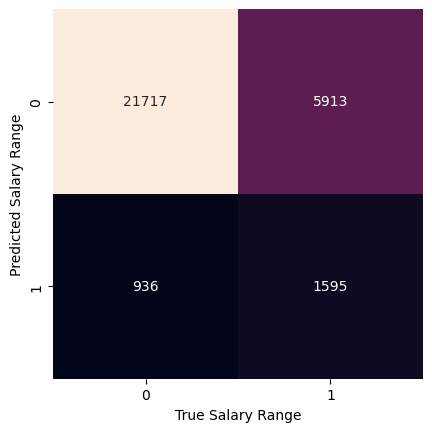

In [64]:
mat = confusion_matrix(Y_train,tnr_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel("True Salary Range")
plt.ylabel("Predicted Salary Range")
plt.show()

In [65]:
tts_pred = mb_model.predict(X_test)

In [66]:
accuracy_score(Y_test,tts_pred)

0.7749667994687915

In [67]:
print(classification_report(Y_test,tts_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



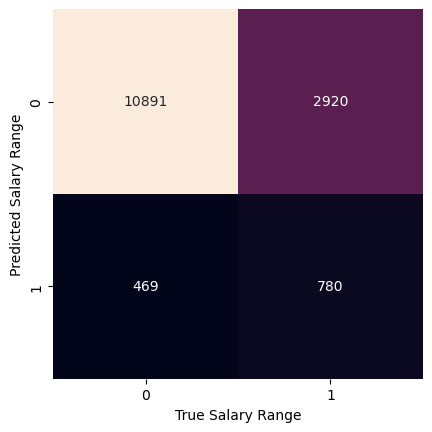

In [68]:
mat = confusion_matrix(Y_test,tts_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel("True Salary Range")
plt.ylabel("Predicted Salary Range")
plt.show()

## For Multinomial Naive Bayes
+ The accuracy score for the train data is 77.29 % and that for test data is 77.50 % 